<a href="https://colab.research.google.com/github/utkarshg1/DeepLearning-6th-July/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering - Main goal is to categorize similar datapoints togethor
1. KMeans
2. Aglomerative clustering

### Based on Age, Income and Spending Categorize similar customers togethor

### Install necessary packages

In [31]:
%pip install yellowbrick plotly nbformat

### Restart and run all cells

In [32]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1: Read the dataset

In [33]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/Mall_Customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Step 2: Perform Basic data quality checks

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [35]:
df.isna().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Spending      0
dtype: int64

In [36]:
df.duplicated().sum()

0

### Step 3: Get the X values
Categorize similar customers based on Age, Income and Spend

In [37]:
X = df[['Age', 'Income', 'Spending']]
X.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [38]:
import plotly.express as px
fig1 = px.scatter_3d(data_frame=X,
                     x='Age',
                     y='Income',
                     z='Spending')
fig1.show()

### Step 4 :Preprocess X data

In [39]:
X.dtypes

Age         int64
Income      int64
Spending    int64
dtype: object

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [41]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [42]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### Step 5: Decide number of clusters with K-elbow method

In [43]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

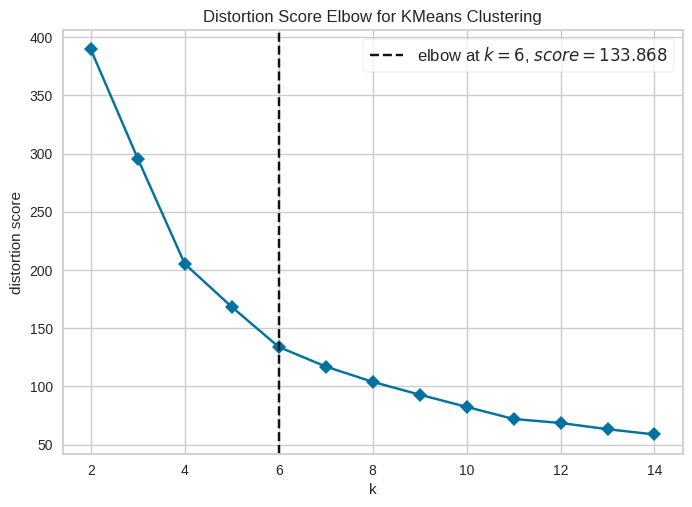

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), timings=False)
visualizer.fit(X_pre)
visualizer.show()

### From above graph create 6 clusters with KMeans

In [45]:
best_kmeans = KMeans(n_clusters=6)
best_kmeans.fit(X_pre)

KMeans(n_clusters=6)

In [46]:
labels = best_kmeans.labels_
labels

array([5, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 3, 5, 0, 2,
       0, 5, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 4, 1, 4, 1, 4, 1,
       2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [47]:
X['label'] = labels

In [48]:
X

,Age,Income,Spending,label
0,19,15,39,5
1,21,15,81,5
2,20,16,6,0
3,23,16,77,5
4,31,17,40,0
...,...,...,...,...
195,35,120,79,1
196,45,126,28,4
197,32,126,74,1
198,32,137,18,4


In [49]:
X.query("label == 0")

,Age,Income,Spending,label
2,20,16,6,0
4,31,17,40,0
6,35,18,6,0
8,64,19,3,0
10,67,19,14,0
12,58,20,15,0
14,37,20,13,0
16,35,21,35,0
18,52,23,29,0
20,35,24,35,0


In [50]:
for i in range(6):
  print(f'Cluster : {i}\n')
  display(X.query(f"label == {i}"))
  print('\n===========================================\n')

Cluster : 0



,Age,Income,Spending,label
2,20,16,6,0
4,31,17,40,0
6,35,18,6,0
8,64,19,3,0
10,67,19,14,0
12,58,20,15,0
14,37,20,13,0
16,35,21,35,0
18,52,23,29,0
20,35,24,35,0




Cluster : 1



,Age,Income,Spending,label
123,39,69,91,1
125,31,70,77,1
127,40,71,95,1
129,38,71,75,1
131,39,71,75,1
133,31,72,71,1
135,29,73,88,1
137,32,73,73,1
139,35,74,72,1
141,32,75,93,1




Cluster : 2



,Age,Income,Spending,label
43,31,39,61,2
47,27,40,47,2
48,29,40,42,2
49,31,40,42,2
51,33,42,60,2
52,31,43,54,2
58,27,46,51,2
61,19,46,55,2
65,18,48,59,2
68,19,48,59,2




Cluster : 3



,Age,Income,Spending,label
40,65,38,35,3
46,50,40,55,3
50,49,42,52,3
53,59,43,60,3
54,50,43,45,3
55,47,43,41,3
56,51,44,50,3
57,69,44,46,3
59,53,46,46,3
60,70,46,56,3




Cluster : 4



,Age,Income,Spending,label
126,43,71,35,4
128,59,71,11,4
130,47,71,9,4
134,20,73,5,4
136,44,73,7,4
138,19,74,10,4
140,57,75,5,4
144,25,77,12,4
146,48,77,36,4
148,34,78,22,4




Cluster : 5



,Age,Income,Spending,label
0,19,15,39,5
1,21,15,81,5
3,23,16,77,5
5,22,17,76,5
7,23,18,94,5
9,30,19,72,5
11,35,19,99,5
13,24,20,77,5
15,22,20,79,5
17,20,21,66,5


In [30]:
centroids = X.groupby(by='label').mean()
centroids

,Age,Income,Spending
label,,,
0,56.333333,54.266667,49.066667
1,25.250000,25.833333,76.916667
2,32.692308,86.538462,82.128205
3,26.684211,57.578947,47.789474
4,41.939394,88.939394,16.969697
5,45.523810,26.285714,19.380952


In [52]:
fig2 = px.scatter_3d(data_frame=X,
                     x="Age",
                     y="Income",
                     z="Spending",
                     color="label")
fig2.show()

### Method 2 : Agglomerative clustering
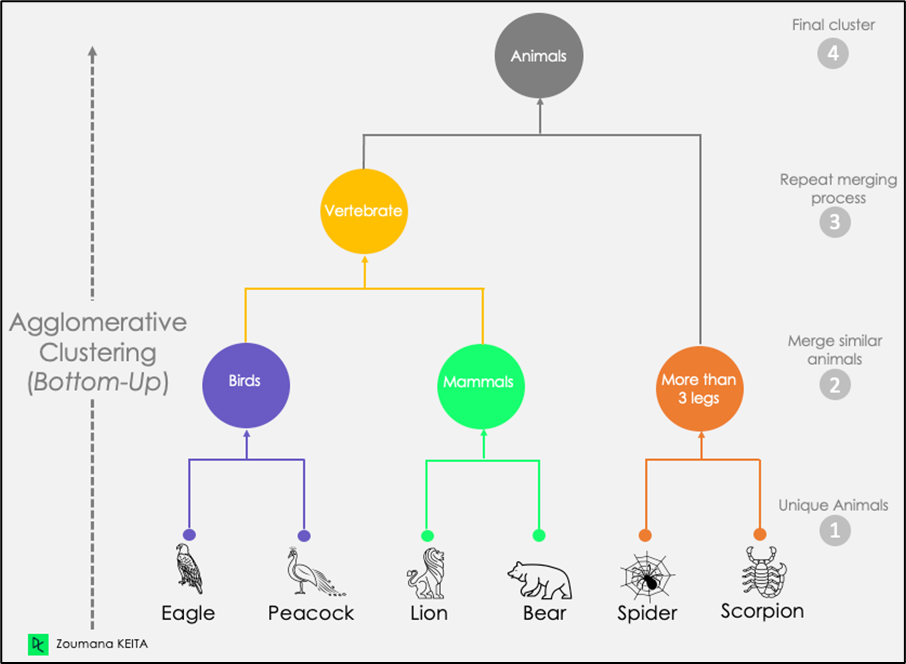

In [53]:
X_pre

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [54]:
from sklearn.cluster import AgglomerativeClustering

In [55]:
model2 = AgglomerativeClustering(n_clusters=6)
model2.fit(X_pre)

AgglomerativeClustering(n_clusters=6)

In [58]:
labels2 = model2.labels_

In [59]:
labels2

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [61]:
X['label2'] = labels2

In [63]:
for i in range(6):
    print(f'Cluster number : {i}')
    display(X.query(f"label2 == {i}"))
    print('\n===============================\n')

Cluster number : 0


,Age,Income,Spending,label,label2
27,35,28,61,5,0
43,31,39,61,2,0
47,27,40,47,2,0
48,29,40,42,2,0
49,31,40,42,2,0
51,33,42,60,2,0
52,31,43,54,2,0
58,27,46,51,2,0
61,19,46,55,2,0
65,18,48,59,2,0




Cluster number : 1


,Age,Income,Spending,label,label2
40,65,38,35,3,1
46,50,40,55,3,1
50,49,42,52,3,1
53,59,43,60,3,1
54,50,43,45,3,1
55,47,43,41,3,1
56,51,44,50,3,1
57,69,44,46,3,1
59,53,46,46,3,1
60,70,46,56,3,1




Cluster number : 2


,Age,Income,Spending,label,label2
123,39,69,91,1,2
125,31,70,77,1,2
127,40,71,95,1,2
129,38,71,75,1,2
131,39,71,75,1,2
133,31,72,71,1,2
135,29,73,88,1,2
137,32,73,73,1,2
139,35,74,72,1,2
141,32,75,93,1,2




Cluster number : 3


,Age,Income,Spending,label,label2
128,59,71,11,4,3
130,47,71,9,4,3
136,44,73,7,4,3
140,57,75,5,4,3
148,34,78,22,4,3
150,43,78,17,4,3
152,44,78,20,4,3
154,47,78,16,4,3
156,37,78,1,4,3
158,34,78,1,4,3




Cluster number : 4


,Age,Income,Spending,label,label2
0,19,15,39,5,4
2,20,16,6,0,4
4,31,17,40,0,4
6,35,18,6,0,4
8,64,19,3,0,4
10,67,19,14,0,4
12,58,20,15,0,4
14,37,20,13,0,4
16,35,21,35,0,4
18,52,23,29,0,4




Cluster number : 5


,Age,Income,Spending,label,label2
1,21,15,81,5,5
3,23,16,77,5,5
5,22,17,76,5,5
7,23,18,94,5,5
9,30,19,72,5,5
11,35,19,99,5,5
13,24,20,77,5,5
15,22,20,79,5,5
17,20,21,66,5,5
19,35,23,98,5,5


In [66]:
fig3 = px.scatter_3d(data_frame=X,
                     x="Age",
                     y="Income",
                     z="Spending",
                     color="label2")
fig3.show()